In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson,skellam
%matplotlib inline
pd.set_option('display.max_columns', 75)
plt.style.use('seaborn')

In [29]:
# import scraping packages
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [17]:
# pull data and explore
df = pd.read_csv("season-1819.csv")
df2 = pd.read_csv("season-1718.csv")

# create total score field, which will be label/y value of model
df['total_score'] = (df.FTHG + df.FTAG)
df2['total_score'] = (df2.FTHG + df2.FTAG)

print('18-19 df info and head:\n')
df.info()
df.head()
df.describe()

print('\n18-19 df info and head:\n')
df2.info()
df2.head()
df2.describe()

18-19 df info and head:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 23 columns):
Date           269 non-null object
HomeTeam       269 non-null object
AwayTeam       269 non-null object
FTHG           269 non-null int64
FTAG           269 non-null int64
FTR            269 non-null object
HTHG           269 non-null int64
HTAG           269 non-null int64
HTR            269 non-null object
Referee        269 non-null object
HS             269 non-null int64
AS             269 non-null int64
HST            269 non-null int64
AST            269 non-null int64
HF             269 non-null int64
AF             269 non-null int64
HC             269 non-null int64
AC             269 non-null int64
HY             269 non-null int64
AY             269 non-null int64
HR             269 non-null int64
AR             269 non-null int64
total_score    269 non-null int64
dtypes: int64(17), object(6)
memory usage: 48.4+ KB


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,total_score
0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,3
1,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,2
2,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2
3,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,3
4,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3


,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,total_score
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,1.553903,1.278810,0.695167,0.594796,14.178439,10.899628,4.884758,3.977695,10.568773,10.427509,5.732342,4.513011,1.542751,1.713755,0.055762,0.085502,2.832714
std,1.338952,1.165565,0.883099,0.793708,5.962393,4.248920,2.699798,2.267442,3.198634,3.607536,2.906971,2.736708,1.219797,1.238317,0.229889,0.280148,1.615540
min,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,10.000000,5.000000,4.000000,10.000000,10.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000,3.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,6.000000,6.000000,13.000000,13.000000,8.000000,6.000000,2.000000,2.000000,0.000000,0.000000,4.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,14.000000,13.000000,6.000000,5.000000,1.000000,1.000000,8.000000



18-19 df info and head:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
Date           380 non-null object
HomeTeam       380 non-null object
AwayTeam       380 non-null object
FTHG           380 non-null int64
FTAG           380 non-null int64
FTR            380 non-null object
HTHG           380 non-null int64
HTAG           380 non-null int64
HTR            380 non-null object
Referee        380 non-null object
HS             380 non-null int64
AS             380 non-null int64
HST            380 non-null int64
AST            380 non-null int64
HF             380 non-null int64
AF             380 non-null int64
HC             380 non-null int64
AC             380 non-null int64
HY             380 non-null int64
AY             380 non-null int64
HR             380 non-null int64
AR             380 non-null int64
total_score    380 non-null int64
dtypes: int64(17), object(6)
memory usage: 68.4+ KB


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,total_score
0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,7
1,2017-08-12,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,2
2,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,5
3,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,3
4,2017-08-12,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,1


,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,total_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.531579,1.147368,0.607895,0.515789,13.584211,10.855263,4.626316,3.763158,10.218421,10.478947,5.739474,4.544737,1.478947,1.565789,0.044737,0.057895,2.678947
std,1.340087,1.177793,0.793403,0.756511,5.771439,4.858700,2.706845,2.317015,3.256360,3.336388,2.993047,2.767241,1.256993,1.259639,0.219375,0.233852,1.665125
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,8.000000,8.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.500000,4.000000,3.500000,10.000000,10.000000,5.000000,4.000000,1.000000,1.000000,0.000000,0.000000,3.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,12.000000,13.000000,8.000000,6.000000,2.000000,2.000000,0.000000,0.000000,4.000000
max,7.000000,6.000000,4.000000,3.000000,35.000000,30.000000,15.000000,14.000000,19.000000,26.000000,18.000000,13.000000,6.000000,7.000000,2.000000,1.000000,9.000000


([array([0.24535316, 0.30483271, 0.2267658 , 0.133829  , 0.06319703,
         0.01486989, 0.01115242, 0.        , 0.        ]),
  array([0.28624535, 0.34200743, 0.24535316, 0.08550186, 0.01858736,
         0.01858736, 0.00371747, 0.        , 0.        ])],
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 2 Lists of Patches objects>)

([<matplotlib.axis.XTick at 0x129f6ec18>,
 <a list of 10 Text xticklabel objects>)

Text(0.5, 0, 'Goals per Match')

Text(0, 0.5, 'Proportion of Matches')

Text(0.5, 1.0, '# Goals/Match (EPL 2018-19 Season)')

(-0.004, 0.4)

season 18-19 home/away goal hist:



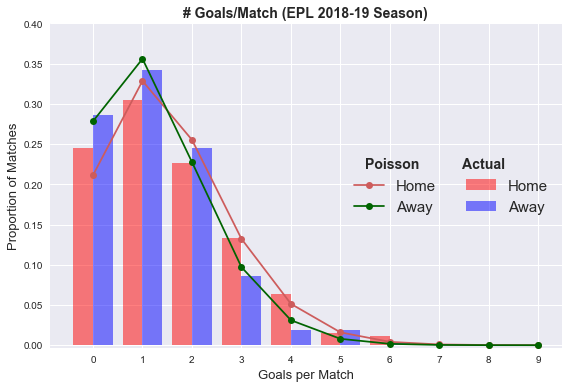

([array([0.23684211, 0.33157895, 0.23947368, 0.09210526, 0.06052632,
         0.03684211, 0.        , 0.00263158, 0.        ]),
  array([0.35789474, 0.33421053, 0.17105263, 0.08684211, 0.04210526,
         0.00526316, 0.00263158, 0.        , 0.        ])],
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 2 Lists of Patches objects>)

([<matplotlib.axis.XTick at 0x12a0c45c0>,
 <a list of 10 Text xticklabel objects>)

Text(0.5, 0, 'Goals/Match')

Text(0, 0.5, 'Prop. of Matches')

Text(0.5, 1.0, '# Goals/Match (EPL 2017-18 Season)')

(-0.004, 0.4)

season 17-18 home/away goal hist:



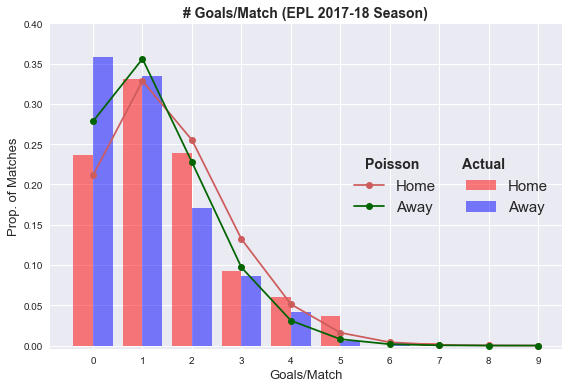

In [51]:
# construct Poisson  for each mean goals value
pos_pred = np.column_stack([[poisson.pmf(i, df.mean()[j]) for i in range(10)] for j in range(2)])

plt.hist(df[['FTHG', 'FTAG']].values, range(10), 
         alpha=0.5, label=['Home', 'Away'],density=True, color=["r", "b"])

# poisson pmf lines
_pois1 = plt.plot([i-0.5 for i in range(1,11)], pos_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
_pois2, = plt.plot([i-0.5 for i in range(1,11)], pos_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

plt.xticks([i-0.5 for i in range(1,11)],[i for i in range(10)])
leg=plt.legend(loc='center right', fontsize=15, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("# Goals/Match (EPL 2018-19 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
print('season 18-19 home/away goal hist:\n')
plt.show()

plt.hist(df2[['FTHG', 'FTAG']].values, range(10), 
         alpha=0.5, label=['Home', 'Away'],density=True, color=["r", "b"])

# poisson pmf lines
_pois1 = plt.plot([i-0.5 for i in range(1,11)], pos_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
_pois2, = plt.plot([i-0.5 for i in range(1,11)], pos_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

plt.xticks([i-0.5 for i in range(1,11)],[i for i in range(10)])
leg=plt.legend(loc='center right', fontsize=15, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})
plt.xlabel("Goals/Match",size=13)
plt.ylabel("Prop. of Matches",size=13)
plt.title("# Goals/Match (EPL 2017-18 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
print('season 17-18 home/away goal hist:\n')
plt.show()

In [44]:
# create total score field, which will be label/y value of model
df_pl = pd.concat([df, df2], ignore_index=True)
print('18-19 df info and head:\n')
df_pl.info()
df_pl.head()

18-19 df info and head:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 23 columns):
Date           649 non-null object
HomeTeam       649 non-null object
AwayTeam       649 non-null object
FTHG           649 non-null int64
FTAG           649 non-null int64
FTR            649 non-null object
HTHG           649 non-null int64
HTAG           649 non-null int64
HTR            649 non-null object
Referee        649 non-null object
HS             649 non-null int64
AS             649 non-null int64
HST            649 non-null int64
AST            649 non-null int64
HF             649 non-null int64
AF             649 non-null int64
HC             649 non-null int64
AC             649 non-null int64
HY             649 non-null int64
AY             649 non-null int64
HR             649 non-null int64
AR             649 non-null int64
total_score    649 non-null int64
dtypes: int64(17), object(6)
memory usage: 116.7+ KB


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,total_score
0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,3
1,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,2
2,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2
3,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,3
4,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3


In [ ]:
# construct Poisson  for each mean goals value
pos_pred = np.column_stack([[poisson.pmf(i, df.mean()[j]) for i in range(10)] for j in range(2)])

plt.hist(df[['FTHG', 'FTAG']].values, range(10), 
         alpha=0.5, label=['Home', 'Away'],density=True, color=["r", "b"])

# poisson pmf lines
_pois1 = plt.plot([i-0.5 for i in range(1,11)], pos_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
_pois2, = plt.plot([i-0.5 for i in range(1,11)], pos_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

plt.xticks([i-0.5 for i in range(1,11)],[i for i in range(10)])
leg=plt.legend(loc='center right', fontsize=15, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("# Goals/Match (2017-2019)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

# below is test scripting

In [34]:
poisson_pred = np.column_stack([[poisson.pmf(i, df.mean()[j]) for i in range(9)] for j in range(2)])

In [36]:
poisson_pred

array([[2.11421111e-01, 2.78368248e-01],
       [3.28527972e-01, 3.55980213e-01],
       [2.55250358e-01, 2.27615601e-01],
       [1.32211462e-01, 9.70257332e-02],
       [5.13609581e-02, 3.10193794e-02],
       [1.59619929e-02, 7.93358105e-03],
       [4.13389904e-03, 1.69092434e-03],
       [9.17668507e-04, 3.08910235e-04]])

In [40]:
poisson_pred[:,0].shape

(8,)

In [38]:
poisson_pred[:,1]

array([2.78368248e-01, 3.55980213e-01, 2.27615601e-01, 9.70257332e-02,
       3.10193794e-02, 7.93358105e-03, 1.69092434e-03, 3.08910235e-04])